<a href="https://colab.research.google.com/github/MayurBhama/CIFAR-10-CNN-Classifier-/blob/main/NETFLIX_EDA__21_Days_Mayur_Bhama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.59 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.shape

(7787, 12)

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


##Data Cleaning and Transformation

In [8]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [9]:
## Handling missing data of Director and Cast
#We cannot use mode in this case so we  are imputing value with unknown
netflix_df['director'] =netflix_df['director'].fillna('Unknown')
netflix_df['cast'] =netflix_df['cast'].fillna('Unknown')


In [10]:
netflix_df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [11]:
### Notes:
#If we fill unknown value in this case then it will show in the top 5 values which will cause a problem.
#Now when we see the top 5 value, US is leading already so filling the null values with the mode value will not cause any harm to the data.
mode = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode)

In [12]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [13]:
netflix_df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [14]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [15]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [16]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format = 'mixed', dayfirst = True)

In [17]:
netflix_df['date_added'].head()

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01


In [18]:
#Extract Year and Month
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [19]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [20]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


## EDA
### QWhat is the type of distribution in the content type?

In [21]:
netflix_df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


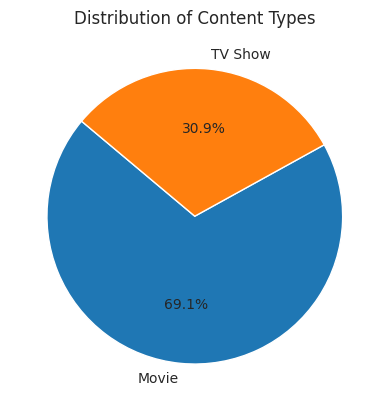

In [22]:
#Creating pie chart
type_count = netflix_df['type'].value_counts()
plt.pie(type_count, labels =type_count.index, autopct= '%1.1f%%', startangle = 140)
plt.title('Distribution of Content Types')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

## Q How has content been added over time?

<Figure size 1400x800 with 0 Axes>

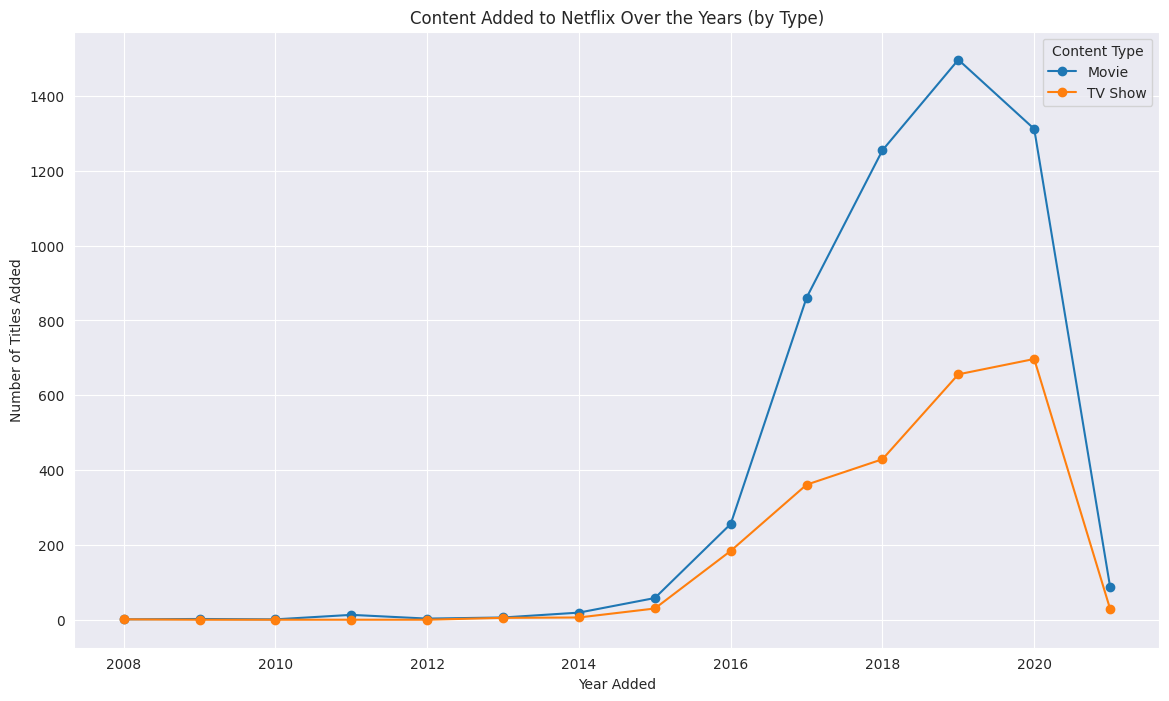

In [23]:
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize = (14,8))
content_over_time.plot(kind = 'line', marker = 'o', figsize = (14,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

QWhat are the most popular geners

#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [24]:
netflix_df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


In [25]:
genres = netflix_df.assign(genre = netflix_df['listed_in'].str.split(', ')).explode('genre')

In [26]:
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [27]:
top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['genre', 'count']

top_genres

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


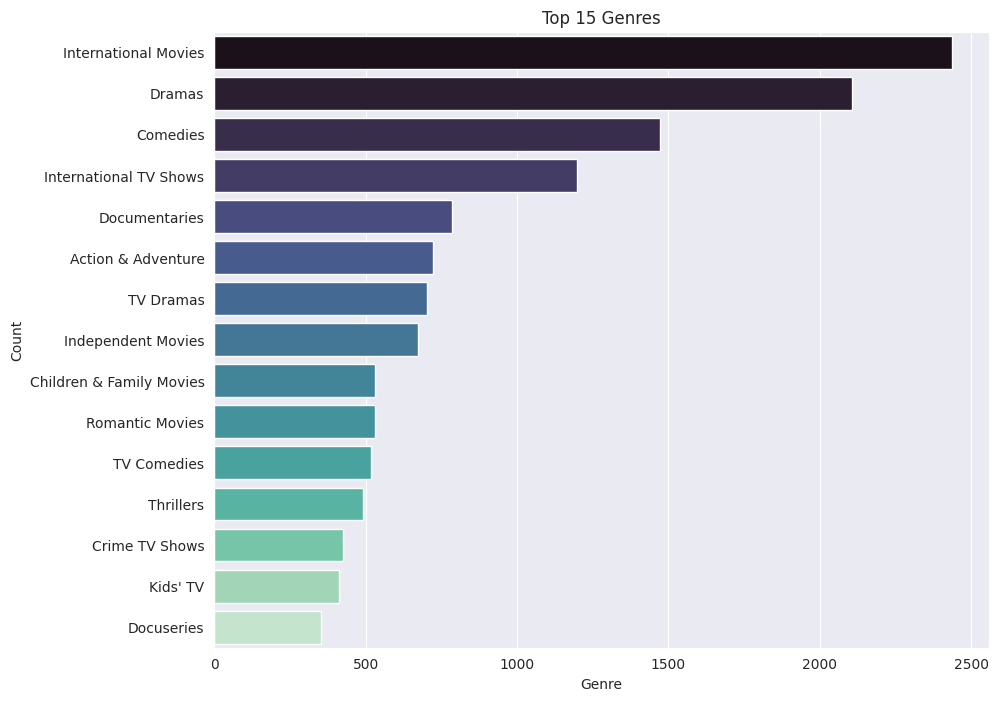

In [28]:
top_15_genres = top_genres.head(15)
plt.figure(figsize= (10, 8))
sns.barplot(x = 'count', y = 'genre', data = top_15_genres, palette = 'mako', hue = 'genre', legend = False)
plt.title('Top 15 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

### Q What is the distribution of content duration?


In [29]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [30]:
#Separate movies and TV shows
movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [31]:
movies['duration'] = movies['duration'].str.replace('min','').astype(int)

In [32]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6


In [33]:
tv_shows['seasons'] = tv_shows['duration'].str.replace('Seasons', '').str.replace('Season', '').astype(int)

In [34]:
tv_shows['duration'].head()

,duration
0,4 Seasons
5,1 Season
11,1 Season
12,1 Season
16,1 Season


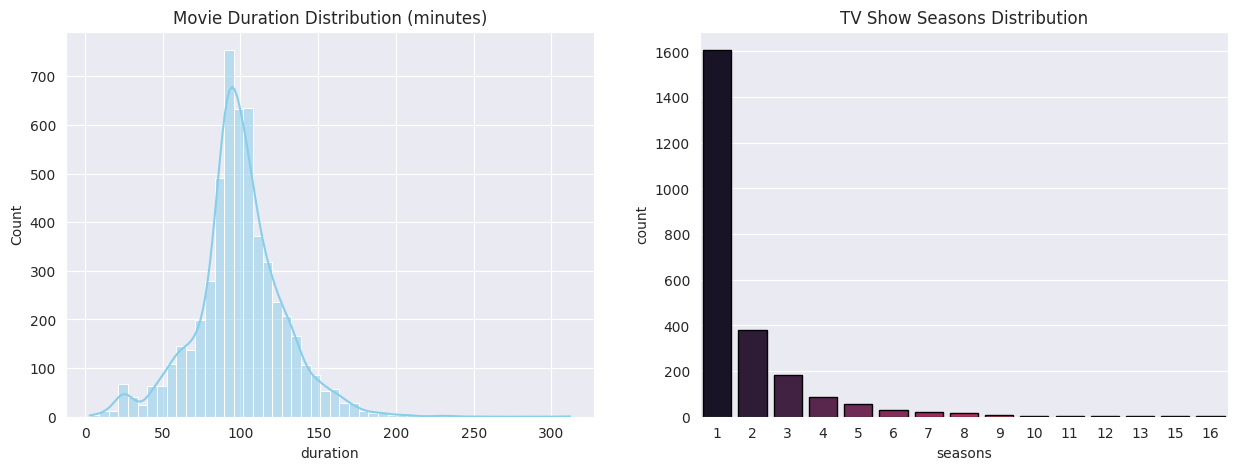

In [35]:
#Plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.histplot(ax = axes[0], data = movies, x = 'duration', bins = 50, kde = True, color = 'skyblue').set_title("Movie Duration Distribution (minutes)")

sns.countplot(ax = axes[1], x = 'seasons', data= tv_shows, palette = 'rocket', edgecolor = 'black').set_title("TV Show Seasons Distribution")

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

### Q Where does the content come from? (Geographical Analysis)

In [36]:
countries = netflix_df.assign(country = netflix_df['country'].str.split(', ')).explode('country')

In [37]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

In [38]:
top_countries_counts_plot = top_countries_counts.head(15)

In [39]:
top_countries_counts_plot

,country,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
5,Japan,285
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


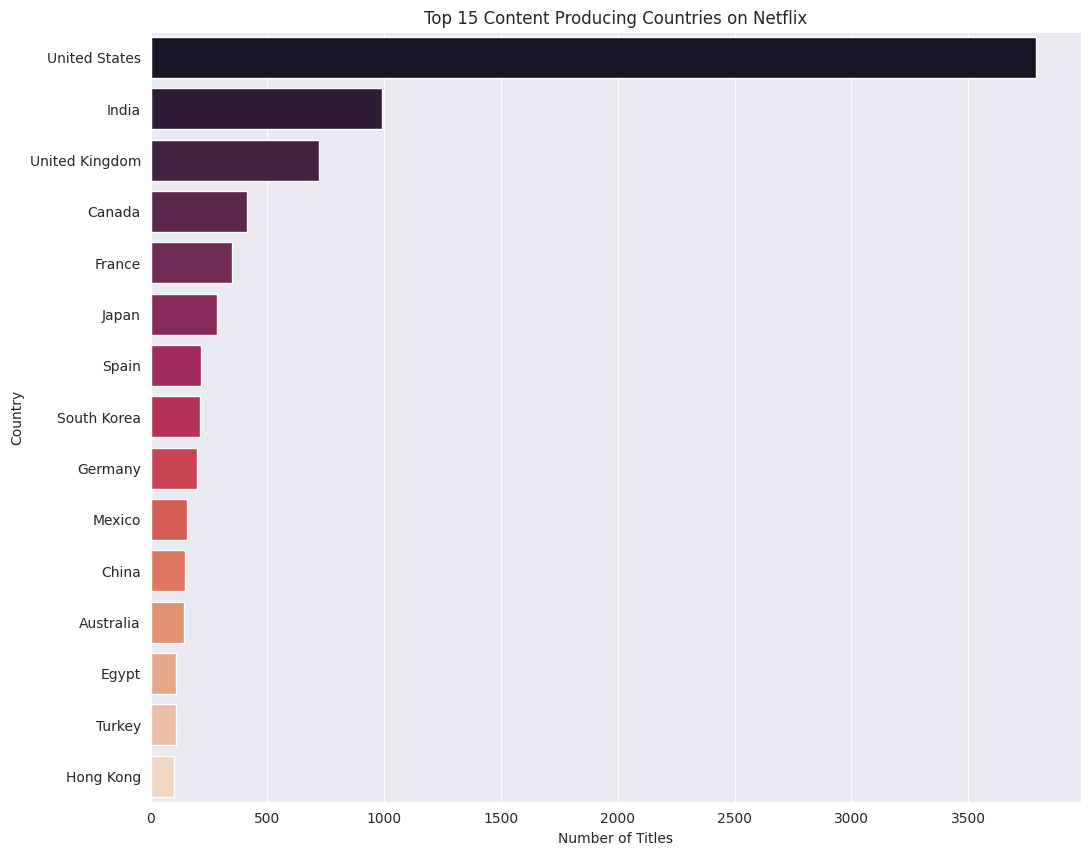

In [40]:
plt.figure(figsize = (12,10))
sns.barplot(y = 'country', x = 'count', data= top_countries_counts_plot, palette = 'rocket', hue = 'country', legend = False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [41]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


### Q What are the maturity ratings of the content?

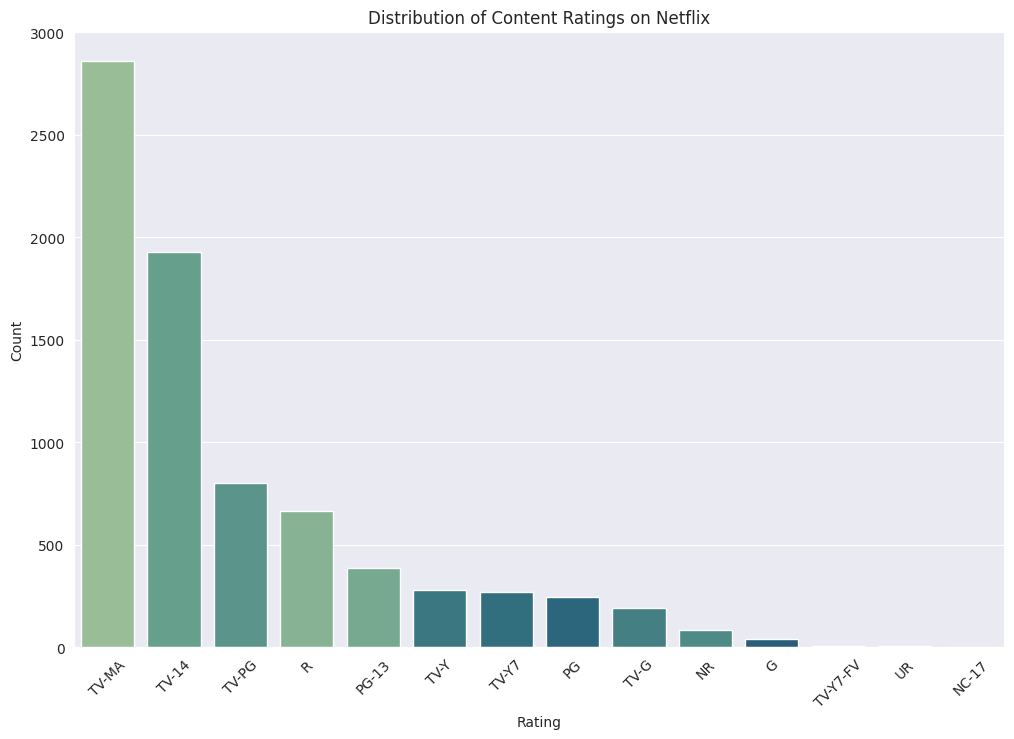

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

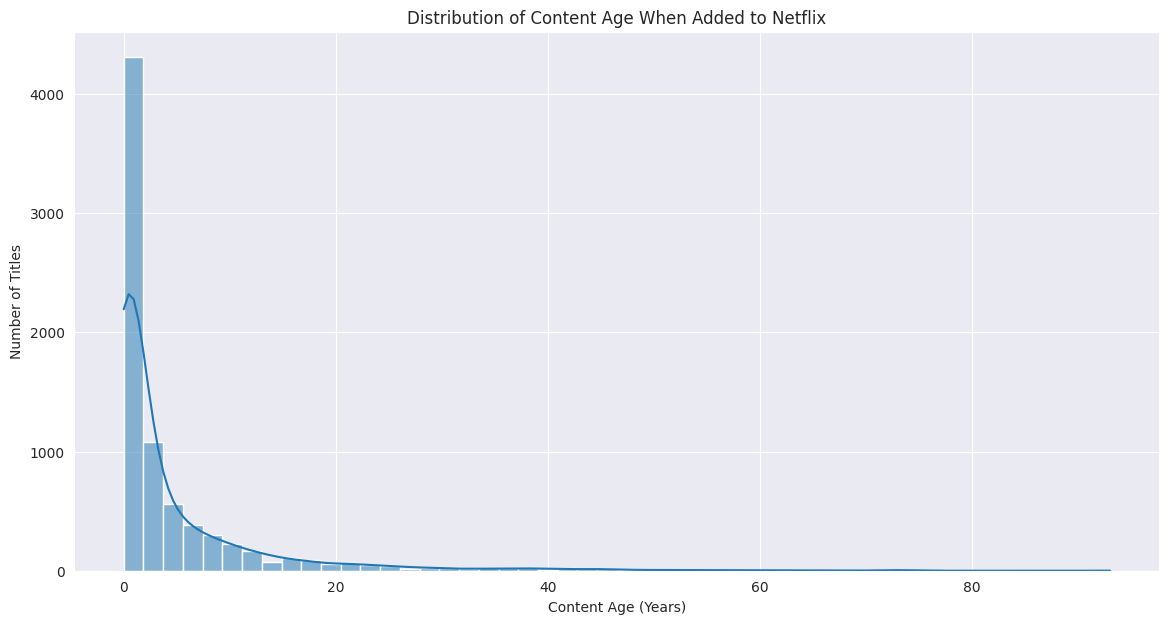

In [43]:
#Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

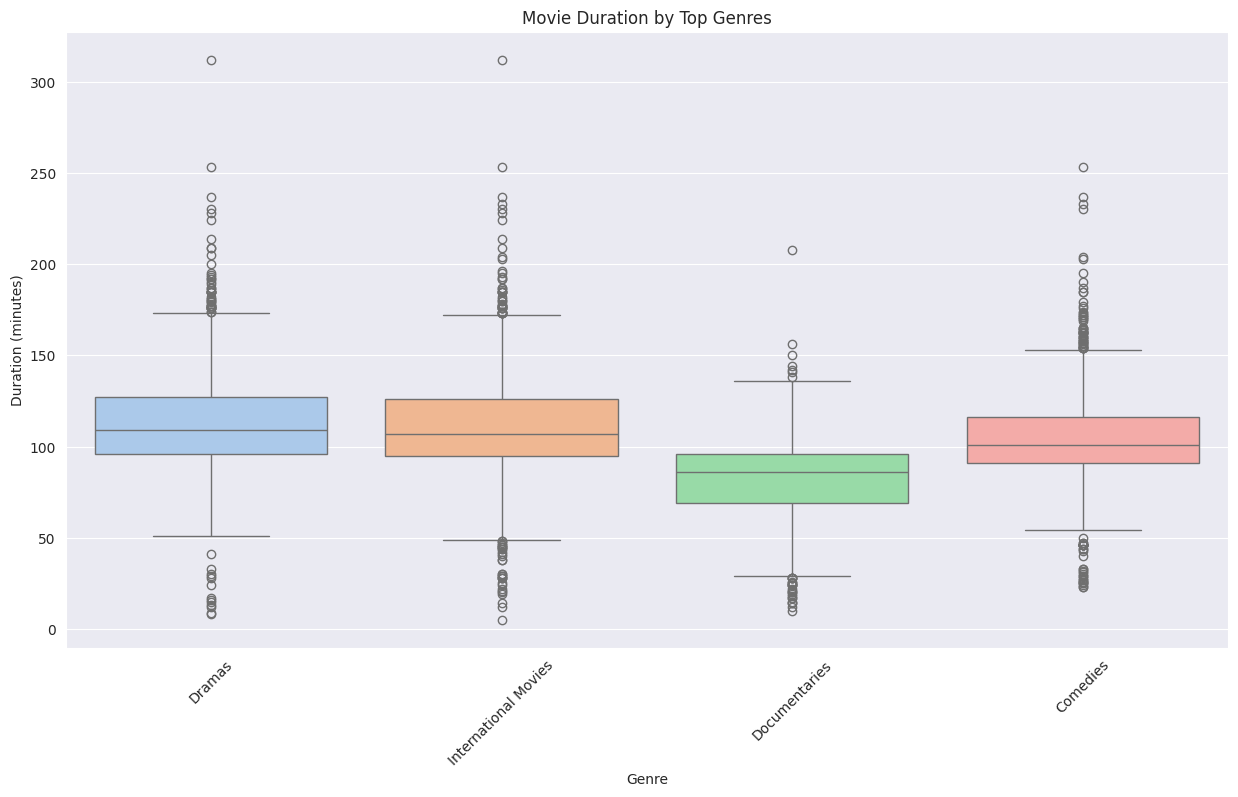

In [44]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

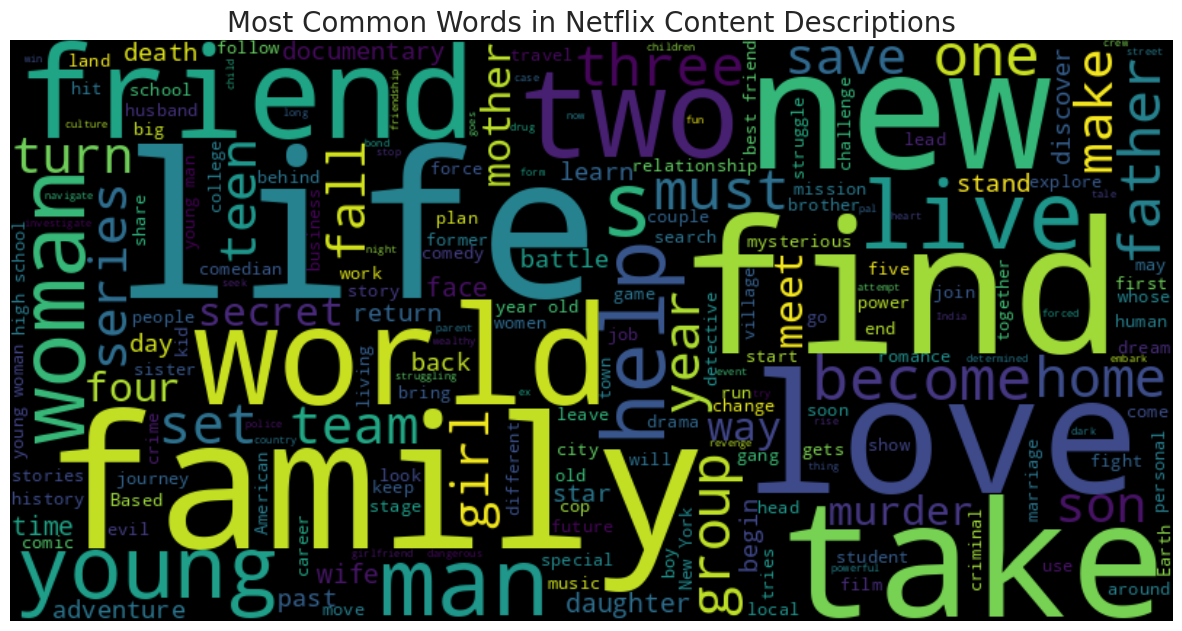

In [45]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

### Q1 How has the distribution of content ratings changed over time?

In [46]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [47]:
content_rating = netflix_df.groupby(['year_added', 'rating']).size().unstack().fillna(0)


In [48]:
content_rating

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2014,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,12.0,4.0,2.0,0.0,0.0,0.0
2015,1.0,0.0,5.0,2.0,2.0,3.0,15.0,8.0,29.0,8.0,8.0,5.0,2.0,0.0
2016,2.0,1.0,28.0,3.0,6.0,14.0,103.0,9.0,163.0,53.0,11.0,46.0,1.0,0.0


<Figure size 1400x1000 with 0 Axes>

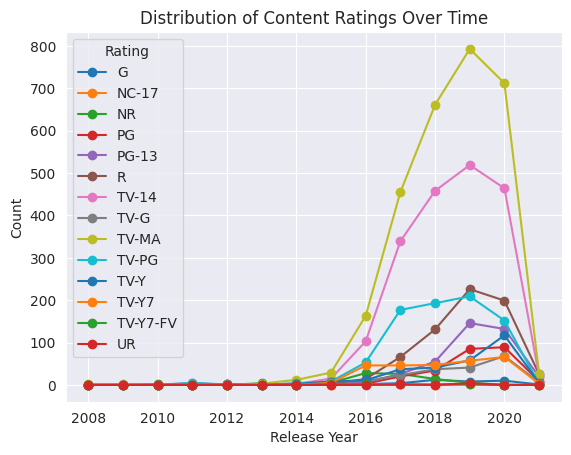

In [56]:
plt.figure(figsize = (14,10))
content_rating.plot(kind = 'line', marker = 'o')
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title = 'Rating')
plt.show()

Interpretation:
1) Netflix has strategically shifted to dominate the market for adults and teens, with TV-MA and TV-14 rated content far outpacing all other categories.

2) While a catalog for families and children (G, TV-Y) exists, it is a much lower priority.

3) Content creation peaked around 2019 before declining, likely due to the pandemic's impact on production or an incomplete dataset.

### Q Is there a relationship between content age and its type (Movie vs. TV Show)?

In [57]:
content_age_type = netflix_df.groupby(['age_on_netflix', 'type']).size().unstack().fillna(0)

In [58]:
content_age_type

type,Movie,TV Show
age_on_netflix,,
-3,0.0,1.0
-2,0.0,1.0
-1,2.0,8.0
0,1612.0,1211.0
1,1086.0,398.0
...,...,...
72,3.0,0.0
73,3.0,0.0
74,3.0,0.0


<Figure size 1400x1000 with 0 Axes>

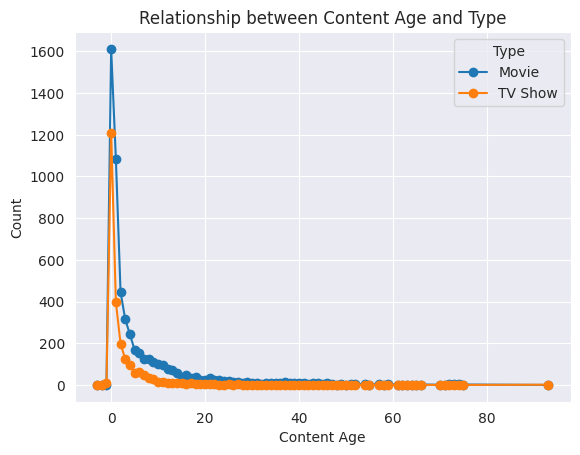

In [59]:
plt.figure(figsize= (14,10))
content_age_type.plot(kind = 'line', marker = 'o')
plt.title('Relationship between Content Age and Type')
plt.xlabel('Content Age')
plt.ylabel('Count')
plt.legend(title = 'Type')
plt.show()

Interpretation:
1) There is a massive spike for both movies and TV shows at a content age of 0. This indicates that the vast majority of content is added to Netflix in the same year it is released.

2) The blue line ("Movie") is consistently higher than the orange line ("TV Show"), especially for newer content. This shows that Netflix has a larger catalog of movies than TV shows overall.

3) Both lines show a "long tail," meaning Netflix has a significant amount of older content, but the count decreases as the age increases.

### Q Can we identify any trends in content production based on the release year vs. the year added to Netflix?

In [60]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [61]:
#The gap between release and addition year
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

#Avearge gap trend over time
avg_gap = netflix_df.groupby('year_added')['age_on_netflix'].mean().reset_index()

#content added per release year
release_trend = netflix_df['release_year'].value_counts().sort_index()

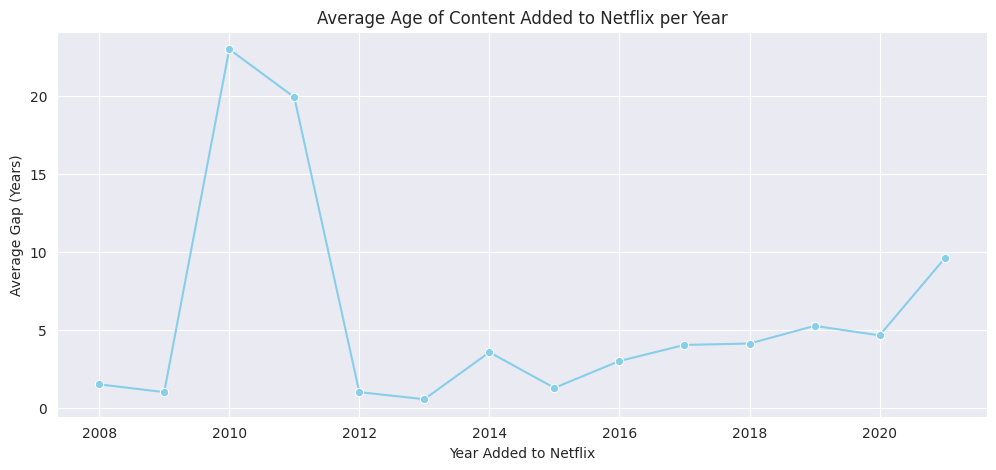

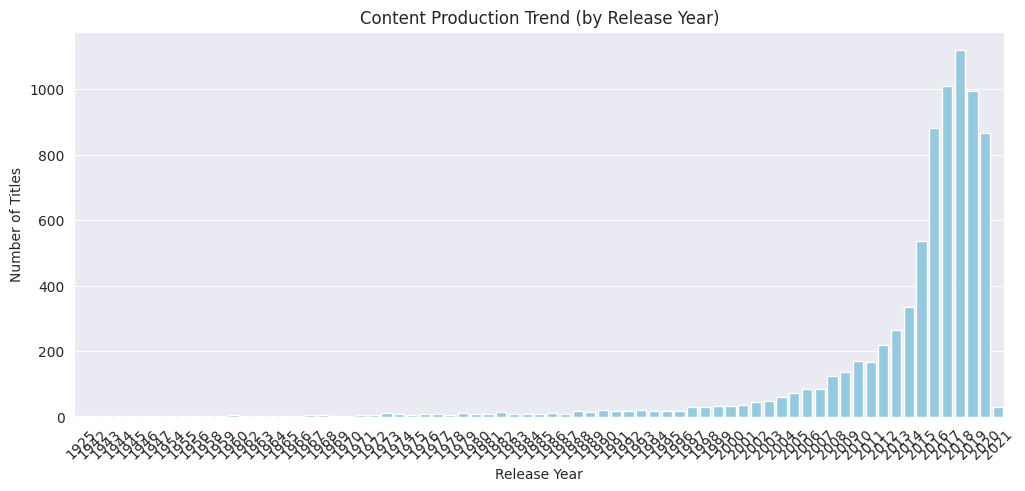

In [66]:
plt.figure(figsize = (12,5))
sns.lineplot(data = avg_gap, x = 'year_added', y = 'age_on_netflix', marker = 'o', color = 'skyblue')
plt.title('Average Age of Content Added to Netflix per Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Gap (Years)')
plt.show()

plt.figure(figsize = (12,5))
sns.countplot(data =netflix_df , x = 'release_year', color = 'skyblue')
plt.xticks(rotation=45)
plt.title('Content Production Trend (by Release Year)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

### Interpretation:
1) From the first graph:

- Between 2008 and 2012, Netflix added a mix of both older and recent content.
The high spikes around 2010–2011 indicate that Netflix was acquiring much older titles (20+ years old) — likely to quickly expand its early content library.

- After 2012, the average age gap dropped sharply, meaning Netflix started adding newer releases closer to their production year.

- Between 2014 and 2020, the average age gap remained low (around 2–5 years), showing a consistent focus on recent productions and original content.

- A small increase after 2020 suggests Netflix may have again licensed some older shows/movies to diversify its catalog.

2) From the second graph:
- The number of titles released each year shows a massive surge after 2010, peaking around 2018–2019.
- This clearly indicates a boom in global content production, and especially Netflix’s increasing investment in original shows and movies.
- The steep rise aligns with Netflix’s shift from being a streaming distributor to a major content producer.

### * What are the most common word pairs or phrases in content descriptions?


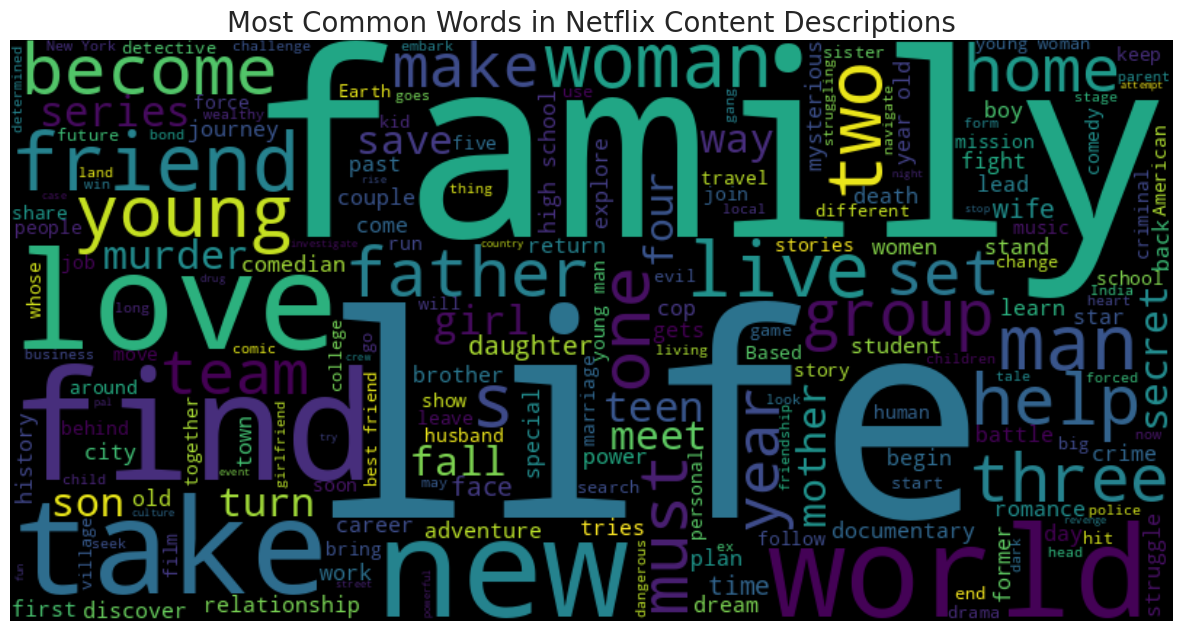

In [67]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

### Interpretation:
1) The most prominent words are "life," "family," "love," and "friend." This indicates that a vast majority of Netflix's content is centered on human connection, relationships, and personal journeys.

2) Words like "woman," "man," "young," "father," "daughter," and "son" are very common. This highlights a strong emphasis on character-driven narratives, focusing on the lives and challenges of specific individuals and their roles within their families and communities.

3) The presence of words like "murder," "secret," "battle," "adventure," and "comedy" shows a rich blend of genres, including mystery, thrillers, action, and humor.

4) Key verbs like "find," "save," "help," "discover," and "become" suggest that many plots revolve around quests, personal transformation, and overcoming obstacles.

##* Who are the top directors on Netflix?

In [68]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [70]:
directors = netflix_df['director'].str.split(', ').explode()

In [74]:
top_directors = directors[directors != 'Unknown'].value_counts().head(10)

In [75]:
top_directors

,count
director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,10


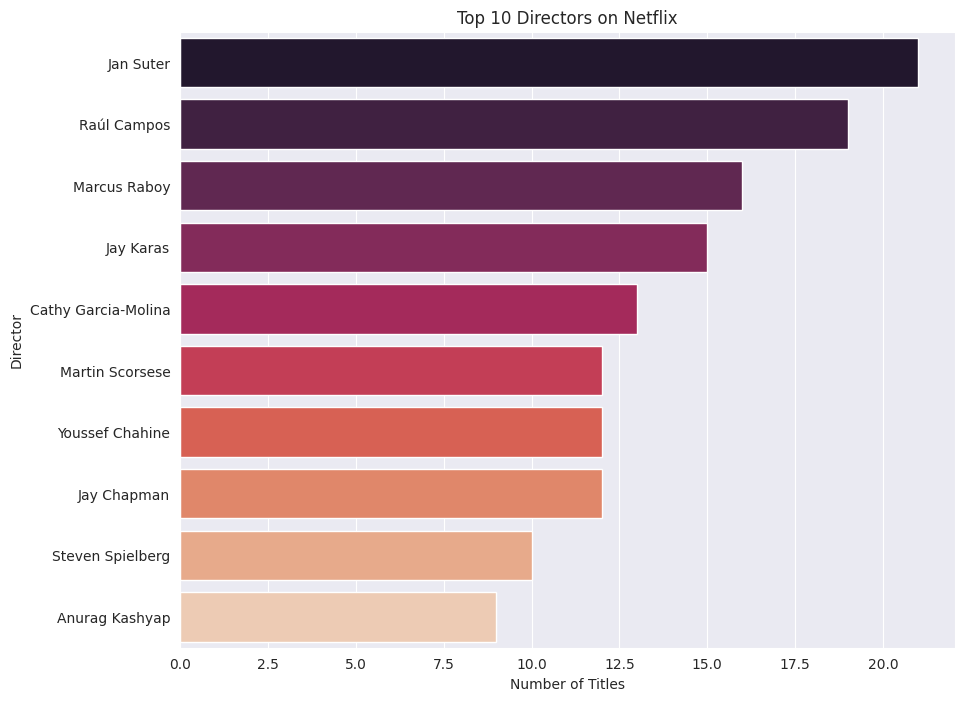

In [76]:
plt.figure(figsize = (10, 8))
sns.barplot(x = top_directors.values, y = top_directors.index, palette = 'rocket', hue = top_directors.index, legend = False)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

### Interpretation:
1) Jan Suter leads with the highest number of titles, followed by Raúl Campos and Marcus Raboy, indicating these directors are highly prolific Netflix content creators.

2) The presence of legendary filmmakers like Martin Scorsese and Steven Spielberg in the middle of the list highlights Netflix's strategy to combine high-volume production with prestige projects from acclaimed directors.

3) Directors from diverse international markets, such as Anurag Kashyap (India) and Cathy Garcia-Molina (Philippines), underscore Netflix's commitment to producing localized content for its global audience.  